# Assigment 2

## Data Augmentation: Edgar filings
---

The purpose of this assignment is to extract valuable information from text and convert it into variables where the initial input is a list of companies in a dataset, the idea will be to reproduce into certain extent what is revised in the notebooks 2.1, 2.2 as well as taking in consideration the block 1 which objective will be to augment/create knowledge of each company/entry.

The following assignment is divided into 3 parts: Text features creations, Dataset augmentation and Preliminary analysis where is each part will be asked to create functions or routines for data processing.  

The expected output of this notebook is a rich, structured data in table format as well as exporatory analysis:

1. **Core Dataset** - Table formated data ready for analytics
2. **Analysis** - Be creative!! here you have the freedom to perform any data analysis of your preference

EDGAR filings text analysis resources: [Github repo](https://github.com/rohitharitash/EDGAR-reports-Text-Analysis), [OpenEDGAR paper](https://arxiv.org/pdf/1806.04973.pdf) and [Code](https://github.com/LexPredict/openedgar)

---
## Part 1: Text features creation

1. Create a function or procedure that perform the NLP tasks revised in Section 2.2.1. (Stopwords adding, Stemming, Tokenization, etc.) feel free to add additional steps found in different resources

In [1]:
import pandas as pd
import pickle

In [2]:
df = pd.read_csv('datasets/table_companies_short.csv',sep=',', index_col=0)
tickers = list(df['ticker'])
df.head()

,cik,exchange,irs,name,sic,ticker,file
196,1470177,OTC,611585332,Axiologix Education Corp,7372,AXLX,https://www.sec.gov/Archives/edgar/data/147017...
1090,59527,NASDAQ,340359955,Lincoln Electric Holdings Inc,3540,LECO,https://www.sec.gov/Archives/edgar/data/59527/...


In [3]:
# Load pickled files
import lxml.html.clean 
data = {}
for i, t in enumerate(tickers):
    with open("reports/" + t + ".txt", "rb") as file:
        data[t] = lxml.html.clean.clean_html(pickle.load(file))

In [4]:
# Define stopwrods
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
stopwordsfile = "dictionaries/financial_stopwrods.txt"
file = open(stopwordsfile, "r")
financial_stop_words = file.read().split('\n')
stopwords = []
stopwords.extend(english_stop_words)
stopwords.extend(financial_stop_words)
stopwords = list(set(stopwords))

In [5]:
print(data['AXLX'][0:600])

<div>0001654954-19-003723.txt : 20190401
0001654954-19-003723.hdr.sgml : 20190401
20190329181508
ACCESSION NUMBER:		0001654954-19-003723
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		45
CONFORMED PERIOD OF REPORT:	20181231
FILED AS OF DATE:		20190401
DATE AS OF CHANGE:		20190329

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			Advantego Corp
		CENTRAL INDEX KEY:			0000869531
		STANDARD INDUSTRIAL CLASSIFICATION:	SERVICES-COMPUTER PROCESSING &amp; DATA PREPARATION [7374]
		IRS NUMBER:				841116515
		STATE OF INCORPORATION:			CO
		FISCAL YEAR END:			1231

	FILING VALUES:
		FORM TYP


In [6]:
from utils import *
for r in data.keys():
    report = data[r]
    report = clean_text(report)
    report = removeStopWords(report, stopwords)
    data[r] = [report] #pandas format

In [7]:
print(data['AXLX'][0][0:600])

txt hdr sgml accession number conformed submission type kpublic document count conformed period filed date date change filer data conformed name advantego corpcentral index key standard industrial classification services computer processing amp data preparation irs number state incorporation cofiscal end filing values form type ksec act actsec file number film number address street east florida ave street suite city denverstate cozip phone mail address street east florida ave street suite city denverstate cozip former former conformed name golden eagle international incdate name change former 


All the NLP tasks are in sentiment_scores.py

3. Use the function `read_dictionary` revised on 2.2.1 to read the dictionaries:
    - positive_words.txt
    - negative_words.txt
    - uncertainty_dictionary.txt
    - constraining_dictionary.txt
    
Importing the file `sentiment_scores.py` calculate the respective scores. Do not forget that this module uses `nltk`

In [8]:
from sentiment_scores import *

positive_words = read_dictionary('dictionaries/positive_words.txt')
negative_words = read_dictionary('dictionaries/negative_words.txt')
uncertainty_dict = read_dictionary('dictionaries/uncertainty_dictionary.txt')
constraining_dict = read_dictionary('dictionaries/constraining_dictionary.txt')

4. Create a formula or method that calculate the relative scores:  $\frac{absoluteScore}{wordsReport}$

In [9]:
# Relative score function
def relative_score(score, wordcount):
    return round(score / wordcount,4) if wordcount != 0 else 0

5. Test all the functions created on one text/report, example:

```python
positive_score = generate_score(report, positive_words)
negative_score = generate_score(report, negative_words)
count_tokens = total_word_count(report)
polarity = polarity_score(positive_score, negative_score)
uncertainty_score = generate_score(report, uncertainty_dict)
constraining_score = generate_score(report, constraining_dict)
avg_sentence_length = average_sentence_length(report)
perc_complex_word = percentage_complex_word(report)
fog_index = calculate_fog_index(avg_sentence_length, perc_complex_word)
positive_relative = relative_score(positive_score, count_tokens)
negative_relative = relative_score(negative_score, count_tokens)
uncertainty_relative = relative_score(uncertainty_score, count_tokens)
constraining_relative = relative_score(constraining_score, count_tokens)
```

---
## Part 2: Dataset augmentation


6. Apply that function to each report in `EDGAR_corpus.pkl` and update the text for each company   
**IMPORTANT: for at least 5 companies since the process might take time to compute** 

In [10]:
print(data['AXLX'][0][0:600])

txt hdr sgml accession number conformed submission type kpublic document count conformed period filed date date change filer data conformed name advantego corpcentral index key standard industrial classification services computer processing amp data preparation irs number state incorporation cofiscal end filing values form type ksec act actsec file number film number address street east florida ave street suite city denverstate cozip phone mail address street east florida ave street suite city denverstate cozip former former conformed name golden eagle international incdate name change former 


In [11]:
data = pd.DataFrame\
    .from_dict(data)\
    .transpose()\
    .sort_index()\
    .rename(columns = {0:'report'})

In [13]:
import time
start_time = time.time()
#---  seconds ---

data['count_tokens'] = data.report.apply(total_word_count)
data['percentage_complex_word'] = data.report.apply(percentage_complex_word)
data['positive_score'] = data.report.apply(lambda x: generate_score(x, positive_words))
data['negative_score'] = data.report.apply(lambda x: generate_score(x, negative_words))
data['uncertainty_score'] = data.report.apply(lambda x: generate_score(x, uncertainty_dict))
data['constraining_score'] = data.report.apply(lambda x: generate_score(x, constraining_dict))
data['relative_positive'] = [relative_score(x, y)*10 for x, y in zip(data['positive_score'], data['count_tokens'])]
data['relative_negative'] = [relative_score(x, y)*10 for x, y in zip(data['negative_score'], data['count_tokens'])]
data['relative_uncertainty'] = [relative_score(x, y)*10 for x, y in zip(data['uncertainty_score'], data['count_tokens'])]
data['relative_constraining'] = [relative_score(x, y)*10 for x, y in zip(data['constraining_score'], data['count_tokens'])]
data['fog_index'] = [calculate_fog_index(x, y) for x, y in zip(data['count_tokens'], data['percentage_complex_word'])]

print("--- %s seconds ---" % (time.time() - start_time))

--- 9.997459888458252 seconds ---


In [14]:
data.head()

,report,count_tokens,percentage_complex_word,positive_score,negative_score,uncertainty_score,constraining_score,relative_positive,relative_negative,relative_uncertainty,relative_constraining,fog_index
AXLX,txt hdr sgml accession number conformed submis...,60540,0.184374,55,277,229,40,0.009,0.046,0.038,0.007,24216.074
LECO,google gbar guser font size padding top import...,259,0.158301,0,0,0,0,0.000,0.000,0.000,0.000,103.663


In [15]:
companies = list(data.index)

7. Re-use the procedure created in Section 1.4.3 and add the risk-loss features to our core dataset

In [16]:
#data_matrix = pd.read_pickle('pickle/EDGAR_matrix.pkl')
#data_matrix.head()
#data_risk_words = data_matrix[['risk', 'loss']]

In [32]:
#data['report'][0]

In [18]:
from flashtext import KeywordProcessor
kp_risk_words = KeywordProcessor()
kp_risk_words.add_keywords_from_list(["risk", "loss"])

In [19]:
len(kp_risk_words.extract_keywords(data['report'][0]))

102

8. Create a relative **risk** score as follows: $\frac{wordsRisk+wordsLoss}{wordsReport}$ add the score to the core table

In [20]:
data['risk_loss'] = [len(kp_risk_words.extract_keywords(data.loc[i,'report'])) for i in data.index]
data['relative_risk'] = [relative_score(x, y)*100 for x, y in zip(data['risk_loss'], data['count_tokens'])]

In [21]:
avg = data.count_tokens.mean()
data['prop_of_average'] = [round(i/avg,2) for i in data.count_tokens]

9. Save the final table, the columns should look more or less like this:
```python
['company_name', 'count_tokens', 'average_sentence_length',
       'percentage_complex_word', 'positive_score', 'negative_score',
       'uncertainty_score', 'constraining_score', 'relative_positive',
       'relative_negative', 'relative_uncertainty', 'fog_index',
       'relative_constraining', 'risk_loss', 'relative_risk']
```

In [22]:
data.columns

Index(['report', 'count_tokens', 'percentage_complex_word', 'positive_score',
       'negative_score', 'uncertainty_score', 'constraining_score',
       'relative_positive', 'relative_negative', 'relative_uncertainty',
       'relative_constraining', 'fog_index', 'risk_loss', 'relative_risk',
       'prop_of_average'],
      dtype='object')

In [23]:
data.drop(columns=['report']).to_csv('data_short.csv')

In [24]:
data.describe()

,count_tokens,percentage_complex_word,positive_score,negative_score,uncertainty_score,constraining_score,relative_positive,relative_negative,relative_uncertainty,relative_constraining,fog_index,risk_loss,relative_risk,prop_of_average
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000
mean,30399.500000,0.171338,27.500000,138.500000,114.500000,20.000000,0.004500,0.023000,0.01900,0.00350,12159.868500,51.000000,0.085000,1.000000
std,42625.103877,0.018436,38.890873,195.868578,161.927453,28.284271,0.006364,0.032527,0.02687,0.00495,17050.049329,72.124892,0.120208,1.400071
min,259.000000,0.158301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,103.663000,0.000000,0.000000,0.010000
25%,15329.250000,0.164819,13.750000,69.250000,57.250000,10.000000,0.002250,0.011500,0.00950,0.00175,6131.765750,25.500000,0.042500,0.505000
50%,30399.500000,0.171338,27.500000,138.500000,114.500000,20.000000,0.004500,0.023000,0.01900,0.00350,12159.868500,51.000000,0.085000,1.000000
75%,45469.750000,0.177856,41.250000,207.750000,171.750000,30.000000,0.006750,0.034500,0.02850,0.00525,18187.971250,76.500000,0.127500,1.495000
max,60540.000000,0.184374,55.000000,277.000000,229.000000,40.000000,0.009000,0.046000,0.03800,0.00700,24216.074000,102.000000,0.170000,1.990000


---
## Part 3: Preliminary analysis


10. With the dataset clean and ready, conduct an exploratory data analysis, there are no rules neither recipies

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

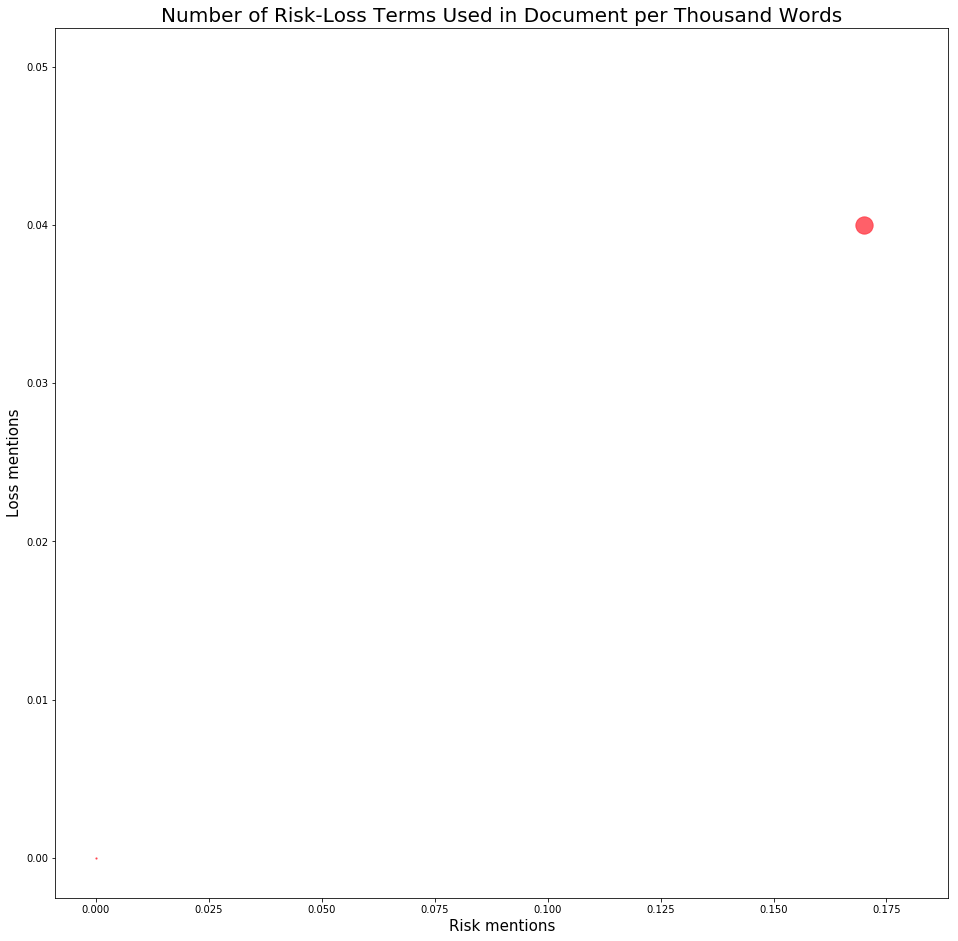

In [26]:
plt.rcParams['figure.figsize'] = [16, 16]

for i, company in enumerate(data.index):
    x = round(data.relative_risk.loc[company],2)
    y = round(data.relative_uncertainty.loc[company],2)
    s = round(data.prop_of_average.loc[company],2)
    plt.scatter(x, y, color='#FF3844', alpha=.8, s=s*150)
    plt.text(x+0.1, y+0.1, data.index[i][0:-11], fontsize=8)
    
plt.title('Number of Risk-Loss Terms Used in Document per Thousand Words', fontsize=20)
plt.xlabel('Risk mentions', fontsize=15)
plt.ylabel('Loss mentions', fontsize=15)
#plt.savefig('risk_loss.png')
plt.show()

You can get some inspiration from [here](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)

In [27]:
data['invest'] = [1 if i < data.relative_uncertainty.median() else 0 for i in data.relative_uncertainty]

In [28]:
data

,report,count_tokens,percentage_complex_word,positive_score,negative_score,uncertainty_score,constraining_score,relative_positive,relative_negative,relative_uncertainty,relative_constraining,fog_index,risk_loss,relative_risk,prop_of_average,invest
AXLX,txt hdr sgml accession number conformed submis...,60540,0.184374,55,277,229,40,0.009,0.046,0.038,0.007,24216.074,102,0.17,1.99,0
LECO,google gbar guser font size padding top import...,259,0.158301,0,0,0,0,0.000,0.000,0.000,0.000,103.663,0,0.00,0.01,1


In [29]:
# Importing the dataset
X = data.loc[:, ['count_tokens','average_sentence_length', 'percentage_complex_word','constraining_score',
                    'relative_positive','relative_negative','relative_risk','fog_index']].values
y = data.loc[:,'invest'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 467)

from sklearn import preprocessing
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count


In [30]:
y_train

array([0])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))